# Problem Statement

Introduction:
The retail industry plays a crucial role in the economy, and accurately predicting sales can significantly impact business decisions and profitability. BigMart, a leading retail chain, wants to leverage data analytics and machine learning techniques to forecast the sales of its various stores. By accurately predicting sales, BigMart aims to optimize inventory management, plan promotions effectively, and improve overall business performance.

Background:
The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim of this data science project is to build a predictive model and find out the sales of each product at a particular store.
Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.

Objectives:
The primary objectives of this project are as follows:
Develop a regression model to predict the sales of BigMart stores.
Achieve a high level of accuracy and precision in sales predictions.
Identify the key factors that influence sales and quantify their impact.
Provide actionable insights to BigMart for inventory management, pricing, and promotional strategies.

Data:
BigMart has provided a comprehensive dataset containing historical sales data for multiple stores. The dataset includes information such as Item_Identifier, Item_Weight, Item_Fat_Content, Item_Visibility, Item_Type, Item_MRP, Outlet_Identifier, Outlet_Establishment_Year, Outlet_Size, Outlet_Location_Type, Outlet_Type, Item_Outlet_Sales. This dataset will be utilized for training and evaluating the predictive model.





# Loading Packages and Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Train.csv")

In [3]:
df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [4]:
df.shape

(8523, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


# Missing Value Treatment

In [7]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In our dataset we have null values

In [8]:
df.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x1d430c92340>,
 'caps': [<matplotlib.lines.Line2D at 0x1d430c92a00>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d430c7cfa0>],
 'medians': [<matplotlib.lines.Line2D at 0x1d431372100>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d431372460>],
 'means': []}

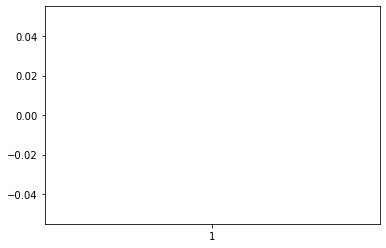

In [9]:
plt.boxplot(df['Item_Weight'])

In [10]:
#since we don't have outliers so we can perform mean imputation
df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace = True)

In [11]:
df['Item_Weight'].isnull().sum()

0

In [12]:
df["Outlet_Size"].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [13]:
df.duplicated().sum()

0

In [14]:
df.loc[df['Outlet_Identifier'] == 'OUT010', 'Outlet_Size'] = 'Small'
df['Outlet_Size'].fillna('High', inplace = True)

In [15]:
df['Outlet_Size'].value_counts()

Small     2943
Medium    2793
High      2787
Name: Outlet_Size, dtype: int64

In our dataset we have have missing value in columns: Item_Weight and Outlet_Size.
- For Item_Weight I have done 'mean imputation' because it do not have outliers.
- To deal with missing value in columns Outlet_Size, performed some EDA before come to a conclusion that outlet OUT010 is of small type and rest missing value replaced by 'High'

# Exploratory Data Analysis

In [16]:
cat_columns = [i for i in df.columns if df[i].dtype == 'O' ]
num_columns = [i for i in df.columns if df[i].dtype != 'O' ]

In [17]:
cat_columns

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [18]:
num_columns

['Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Item_Outlet_Sales']

In [19]:
for i in cat_columns:
    print(df[i].value_counts())
    print(" ")

FDW13    10
FDG33    10
DRE49     9
FDX20     9
FDG09     9
         ..
DRF48     1
FDO33     1
FDC23     1
FDQ60     1
FDT35     1
Name: Item_Identifier, Length: 1559, dtype: int64
 
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64
 
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64
 
OUT027    935
OUT013    932
OUT035    930
OUT049    930
OUT046    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64
 
Small

In [20]:
df.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.012049,0.024756,-0.008301,0.011550
Item_Visibility,-0.012049,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.024756,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.008301,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.011550,-0.128625,0.567574,-0.049135,1.000000


<AxesSubplot:>

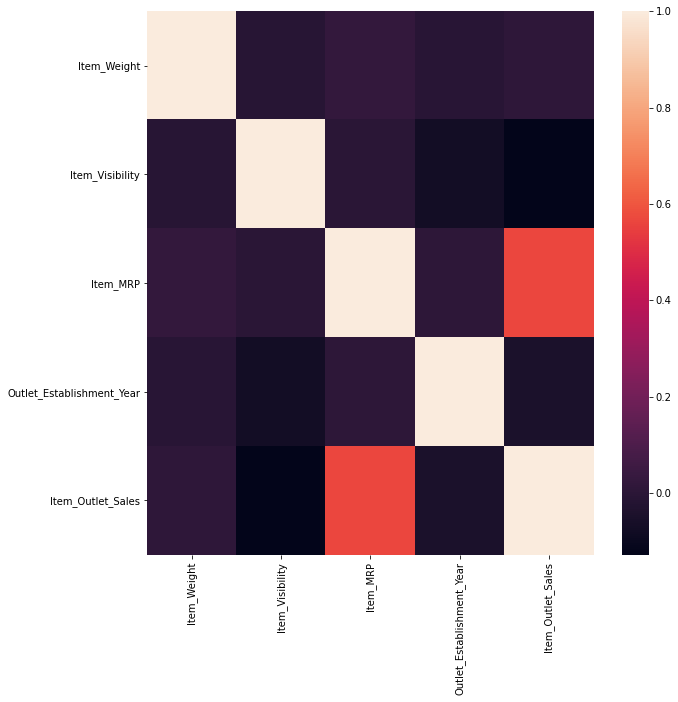

In [21]:
plt.figure(figsize = (10,10))
sns.heatmap(df.corr())

- Item_Outlet_sales is correlated with Item_MRP with some extend but not with rest numeric columns

# Visualization of Item_Outlet_Sales Vs Other Features 

Text(0.5, 0, 'Outlet Type')

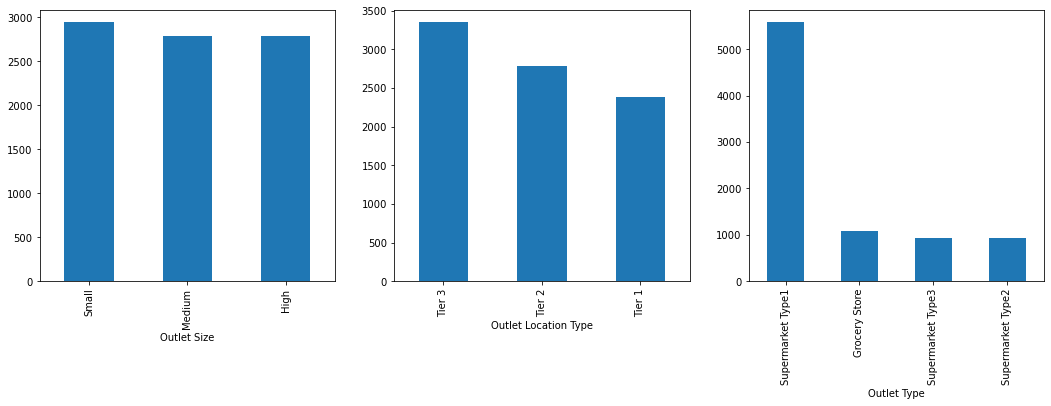

In [22]:
plt.figure(figsize = (18,5))
plt.subplot(1,3,1)
df['Outlet_Size'].value_counts().plot(kind = 'bar')
plt.xlabel("Outlet Size")
plt.subplot(1,3,2)
df['Outlet_Location_Type'].value_counts().plot(kind = 'bar')
plt.xlabel("Outlet Location Type")
plt.subplot(1,3,3)
df['Outlet_Type'].value_counts().plot(kind = 'bar')
plt.xlabel("Outlet Type")

In [23]:
df["Item_Fat_Content"] = df["Item_Fat_Content"].str.replace('LF', 'Low Fat')
df["Item_Fat_Content"] = df["Item_Fat_Content"].str.replace('low fat', 'Low Fat')
df["Item_Fat_Content"] = df["Item_Fat_Content"].str.replace('reg', 'Regular')

In [24]:
df["Item_Fat_Content"].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [25]:
df.groupby(['Item_Fat_Content'])["Item_Outlet_Sales"].sum()

Item_Fat_Content
Low Fat    1.190409e+07
Regular    6.687031e+06
Name: Item_Outlet_Sales, dtype: float64

<AxesSubplot:xlabel='Item_Fat_Content'>

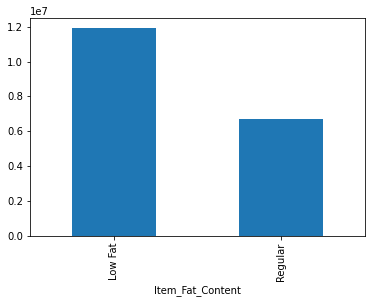

In [26]:
df.groupby(['Item_Fat_Content'])["Item_Outlet_Sales"].sum().plot(kind = 'bar')

- From above visualization we can say Customers prefer products with low fat

In [27]:
cat_columns

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [28]:
df.groupby(['Outlet_Identifier'])["Item_Outlet_Sales"].sum()

Outlet_Identifier
OUT010    1.883402e+05
OUT013    2.142664e+06
OUT017    2.167465e+06
OUT018    1.851823e+06
OUT019    1.796941e+05
OUT027    3.453926e+06
OUT035    2.268123e+06
OUT045    2.036725e+06
OUT046    2.118395e+06
OUT049    2.183970e+06
Name: Item_Outlet_Sales, dtype: float64

<AxesSubplot:ylabel='Item_Outlet_Sales'>

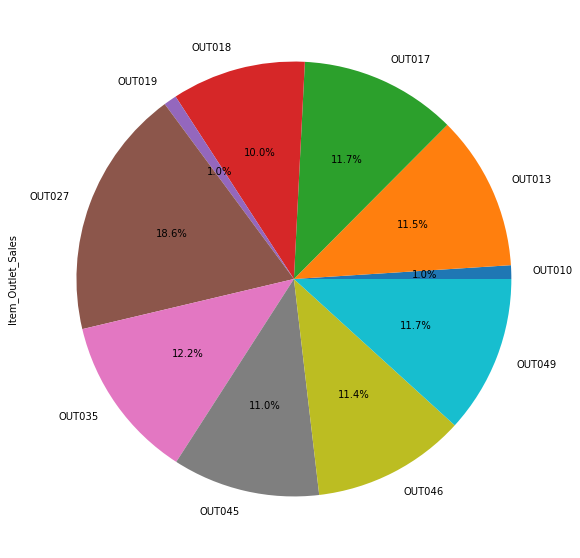

In [29]:
plt.figure(figsize = (10,10))
df.groupby(['Outlet_Identifier'])["Item_Outlet_Sales"].sum().plot(kind = 'pie', autopct = '%1.1f%%')

In [30]:
df.groupby(['Outlet_Size'])["Item_Outlet_Sales"].sum()

Outlet_Size
High      6.346854e+06
Medium    7.489719e+06
Small     4.754552e+06
Name: Item_Outlet_Sales, dtype: float64

In [31]:
a = df.groupby(['Outlet_Size'])["Item_Outlet_Sales"].sum().index

In [32]:
b = []
for i in range(3):
    a = df.groupby(['Outlet_Size'])["Item_Outlet_Sales"].sum().get(i)
    b.append(a)
b

[6346854.349199978, 7489718.6916, 4754552.369599995]

<AxesSubplot:xlabel='Outlet_Size'>

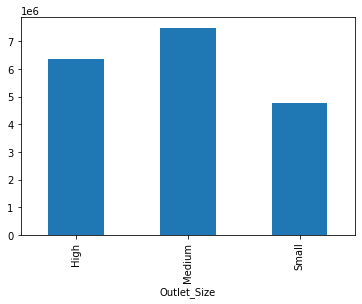

In [33]:
df.groupby(['Outlet_Size'])["Item_Outlet_Sales"].sum().plot(kind = 'bar')

In [34]:
df.groupby(['Outlet_Location_Type'])["Item_Outlet_Sales"].sum()

Outlet_Location_Type
Tier 1    4.482059e+06
Tier 2    6.472314e+06
Tier 3    7.636753e+06
Name: Item_Outlet_Sales, dtype: float64

<AxesSubplot:xlabel='Outlet_Location_Type'>

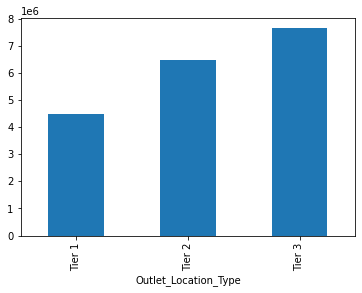

In [35]:
df.groupby(['Outlet_Location_Type'])["Item_Outlet_Sales"].sum().plot(kind = 'bar')

<AxesSubplot:ylabel='Item_Outlet_Sales'>

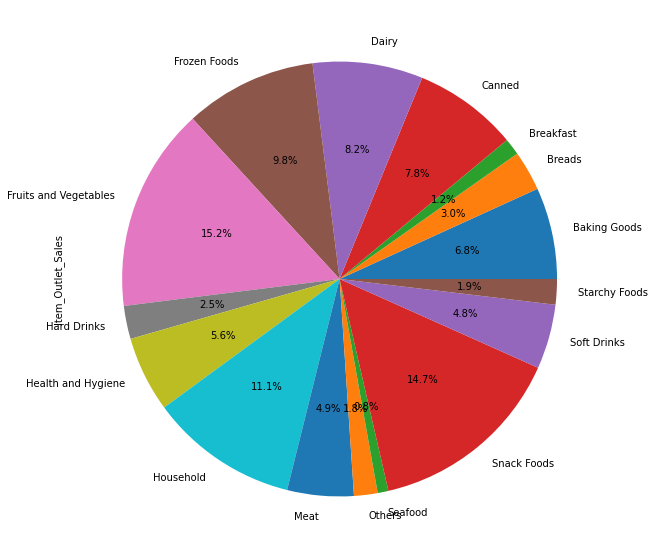

In [36]:
plt.figure(figsize = (10,10))
df.groupby(['Item_Type'])["Item_Outlet_Sales"].sum().plot(kind = 'pie', autopct = '%1.1f%%')

<AxesSubplot:xlabel='Outlet_Type'>

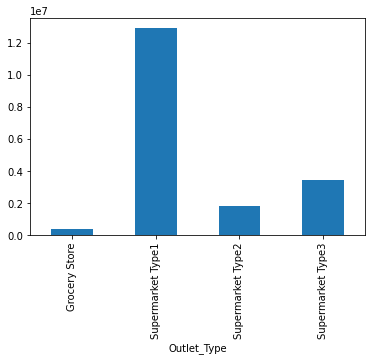

In [37]:
df.groupby(['Outlet_Type'])["Item_Outlet_Sales"].sum().plot(kind = 'bar')

from above visualization's we can see in which features which category have more item_outlet_sales
- in Outlet_Type: Supermarket Type1 had maximum sales
- in Item_Type: customer mainly buy products like vegtable & fruits, Snakes food and Household products etc
- the maximum sales we get from outlets situated in tier 3 city.
- Outlet OUT027 had maximum sales.
- sales is maximum for oulet size medium

# Information About Each Outlet

In [38]:
for i in df['Outlet_Identifier'].unique():
    a = int(df[df['Outlet_Identifier'] == i]['Outlet_Establishment_Year'].unique())
    b = str(df[df['Outlet_Identifier'] == i]['Outlet_Size'].unique())
    c = str(df[df['Outlet_Identifier'] == i]['Outlet_Location_Type'].unique())
    d = str(df[df['Outlet_Identifier'] == i]['Outlet_Type'].unique())
    e = int(df[df['Outlet_Identifier'] == i]['Item_Outlet_Sales'].sum())
    f = int(df[df['Outlet_Identifier'] == i]['Item_Outlet_Sales'].mean())
    print("OUTLET: {}\n Established in year: {}\n Size: {}\n Location Type: {}\n Outlet Type: {}\n Total Sale: {}\n Average Sales: {}".format(i,a,b,c,d,e,f))
    print(" ")

OUTLET: OUT049
 Established in year: 1999
 Size: ['Medium']
 Location Type: ['Tier 1']
 Outlet Type: ['Supermarket Type1']
 Total Sale: 2183969
 Average Sales: 2348
 
OUTLET: OUT018
 Established in year: 2009
 Size: ['Medium']
 Location Type: ['Tier 3']
 Outlet Type: ['Supermarket Type2']
 Total Sale: 1851822
 Average Sales: 1995
 
OUTLET: OUT010
 Established in year: 1998
 Size: ['Small']
 Location Type: ['Tier 3']
 Outlet Type: ['Grocery Store']
 Total Sale: 188340
 Average Sales: 339
 
OUTLET: OUT013
 Established in year: 1987
 Size: ['High']
 Location Type: ['Tier 3']
 Outlet Type: ['Supermarket Type1']
 Total Sale: 2142663
 Average Sales: 2298
 
OUTLET: OUT027
 Established in year: 1985
 Size: ['Medium']
 Location Type: ['Tier 3']
 Outlet Type: ['Supermarket Type3']
 Total Sale: 3453926
 Average Sales: 3694
 
OUTLET: OUT045
 Established in year: 2002
 Size: ['High']
 Location Type: ['Tier 2']
 Outlet Type: ['Supermarket Type1']
 Total Sale: 2036725
 Average Sales: 2192
 
OUTLET: O

In [ ]:
sns.pairplot(df)

Not got much info from this pairplot but get to know that 
- Items with great visiblity have less Item oulet sales
- Items with more MRP have move Item outlet sales

In [ ]:
sns.displot(df['Item_MRP'], kde =True)

In [ ]:
plt.figure(figsize = (25,10))
sns.barplot(x = df['Item_Type'], y = df['Item_Outlet_Sales'], hue = df['Item_Fat_Content'])

In [ ]:
plt.figure(figsize = (10, 5)) 
sns.barplot(x = df['Outlet_Type'], y = df['Item_Outlet_Sales'], hue = df['Outlet_Location_Type'])

In [ ]:
plt.figure(figsize = (10, 5)) # df['Item_Outlet_Sales'] df['Outlet_Type']
sns.barplot(x = 'Outlet_Type', y = 'Item_Outlet_Sales', hue = 'Outlet_Size', data = df)

In [ ]:
df3 = df[(df['Outlet_Identifier'] == 'OUT010') | (df['Outlet_Identifier'] == 'OUT019')]

In [ ]:
df3

In [ ]:
for i in cat_columns:
    print(df3[i].value_counts())

In [ ]:
df3.nunique()

## Ferture Engineering

In [ ]:
df

In [ ]:
#removing feature's those who have less correlation with target variable
a = ['Item_Identifier', 'Item_Weight', 'Item_Visibility', 'Outlet_Establishment_Year']
df = df.drop(columns = a)

In [ ]:
df

In [ ]:
# performing Lable Encoding
df['Item_Fat_Content'] = df['Item_Fat_Content'].map({'Low Fat': 1, 'Regular': 0})
df['Outlet_Size'] = df['Outlet_Size'].map({'Small': 0, 'Medium': 1, 'High': 2})
df['Outlet_Location_Type'] = df['Outlet_Location_Type'].map({'Tier 1': 0, 'Tier 2': 1, 'Tier 3': 2})
df['Outlet_Type'] = df['Outlet_Type'].map({'Grocery Store': 0, 'Supermarket Type1': 1, 'Supermarket Type2': 2, 'Supermarket Type3': 3})

In [ ]:
df

In [ ]:
df['Item_Type'].value_counts()

In [ ]:
df['Item_Type'] = df['Item_Type'].replace(['Canned', 'Meat'], 'Meat & Canned')
df['Item_Type'] = df['Item_Type'].replace(['Dairy', 'Breads', 'Breakfast'], 'Dairy, Breads & Breakfast')
df['Item_Type'] = df['Item_Type'].replace(['Frozen Foods', 'Baking Goods'], 'Frozen & Baking Foods')
df['Item_Type'] = df['Item_Type'].replace(['Household', 'Health and Hygiene'], 'Household & Health')
df['Item_Type'] = df['Item_Type'].replace(['Soft Drinks', 'Hard Drinks', 'Others', 'Starchy Foods', 'Seafood'], 'Other')

In [ ]:
df['Item_Type'] = df['Item_Type'].map({'Frozen & Baking Foods': 0, 'Household & Health': 1, 'Fruits and Vegetables': 2, 'Snack Foods': 3, 'Meat & Canned': 4, 'Dairy & Breads': 5, 'Other': 6})

In [ ]:
df

In [ ]:
#Performing One Hot Encoding on feature Outlet_Identifier
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()

In [ ]:
encoded = encoder.fit_transform(df[['Outlet_Identifier']])

In [ ]:
encoded_df = pd.DataFrame(encoded.toarray(), columns = encoder.get_feature_names_out())

In [ ]:
encoded_df

In [ ]:
df = pd.concat([df, encoded_df], axis =1)

In [ ]:
df = df.drop('Outlet_Identifier', axis =1)

In [ ]:
df['Item_Type']=df['Item_Type'].fillna(method = 'bfill', axis =0)

In [ ]:
df['Item_Type'].value_counts()

In [ ]:
df.isnull().sum()

# Loading and Cleaning Test Dataset

In [ ]:
df2 = pd.read_csv('Test.csv')

In [ ]:
df2_copy = df2

In [ ]:
df2

In [ ]:
df2.shape

In [ ]:
df2.info()

In [ ]:
df2.isnull().sum()

In [ ]:
df2["Item_Fat_Content"] = df2["Item_Fat_Content"].str.replace('LF', 'Low Fat')
df2["Item_Fat_Content"] = df2["Item_Fat_Content"].str.replace('low fat', 'Low Fat')
df2["Item_Fat_Content"] = df2["Item_Fat_Content"].str.replace('reg', 'Regular')

In [ ]:
df2.loc[df2['Outlet_Identifier'] == 'OUT010', 'Outlet_Size'] = 'Small'
df2['Outlet_Size'].fillna('High', inplace = True)

In [ ]:
a = ['Item_Identifier', 'Item_Weight', 'Item_Visibility', 'Outlet_Establishment_Year']
df2 = df2.drop(columns = a)

In [ ]:
df2

In [ ]:
df2['Item_Fat_Content'] = df2['Item_Fat_Content'].map({'Low Fat': 1, 'Regular': 0})
df2['Outlet_Size'] = df2['Outlet_Size'].map({'Small': 0, 'Medium': 1, 'High': 2})
df2['Outlet_Location_Type'] = df2['Outlet_Location_Type'].map({'Tier 1': 0, 'Tier 2': 1, 'Tier 3': 2})
df2['Outlet_Type'] = df2['Outlet_Type'].map({'Grocery Store': 0, 'Supermarket Type1': 1, 'Supermarket Type2': 2, 'Supermarket Type3': 3})

In [ ]:
df2['Item_Type'] = df2['Item_Type'].replace(['Canned', 'Meat'], 'Meat & Canned')
df2['Item_Type'] = df2['Item_Type'].replace(['Dairy', 'Breads', 'Breakfast'], 'Dairy, Breads & Breakfast')
df2['Item_Type'] = df2['Item_Type'].replace(['Frozen Foods', 'Baking Goods'], 'Frozen & Baking Foods')
df2['Item_Type'] = df2['Item_Type'].replace(['Household', 'Health and Hygiene'], 'Household & Health')
df2['Item_Type'] = df2['Item_Type'].replace(['Soft Drinks', 'Hard Drinks', 'Others', 'Starchy Foods', 'Seafood'], 'Other')

In [ ]:
df2['Item_Type'] = df2['Item_Type'].map({'Frozen & Baking Foods': 0, 'Household & Health': 1, 'Fruits and Vegetables': 2, 'Snack Foods': 3, 'Meat & Canned': 4, 'Dairy & Breads': 5, 'Other': 6})

In [ ]:
#df2['Item_MRP'] = min_max.fit_transform(df2[['Item_MRP']])

In [ ]:
encoded = encoder.fit_transform(df2[['Outlet_Identifier']])
encoded_df2 = pd.DataFrame(encoded.toarray(), columns = encoder.get_feature_names_out())

In [ ]:
df2

In [ ]:
df2 = pd.concat([df2, encoded_df2], axis =1)

In [ ]:
df2 = df2.drop('Outlet_Identifier', axis =1)

In [ ]:
df2['Item_Type']=df2['Item_Type'].fillna(method = 'bfill', axis =0)

In [ ]:
df

In [ ]:
df2

# Model Training

In [ ]:
Y= df['Item_Outlet_Sales']

In [ ]:
df = df.drop('Item_Outlet_Sales', axis = 1)

In [ ]:
X = df

Train and Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.30, random_state = 10)

In [ ]:
# Performing Standardization
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
x_train_scaled = scaler.fit_transform(x_train)

In [ ]:
x_test_scaled = scaler.transform(x_test)

### Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [ ]:
regression.fit(x_train_scaled, y_train)

In [ ]:
y_pred_test = regression.predict(x_test_scaled)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
print(mean_squared_error(y_test, y_pred_test))
print(mean_absolute_error(y_test, y_pred_test))
print(np.sqrt(mean_squared_error(y_test, y_pred_test)))

In [ ]:
# R squared score
score = r2_score(y_test, y_pred_test)
score

In [ ]:
#Adjsuted R sqaured value
1-((1-score)*(len(y_test)-1)/(len(y_test)-(x_test.shape[1])-1))

### Regularized Linear Regression

In [ ]:
from sklearn.linear_model import ElasticNet, Ridge, Lasso
elastic = ElasticNet()
ridge = Ridge()
lasso = Lasso()

In [ ]:
elastic.fit(x_train_scaled, y_train)

In [ ]:
y_pred_elastic = elastic.predict(x_test_scaled)

In [ ]:
y_pred_elastic

In [ ]:
score = r2_score(y_test, y_pred_elastic)

In [ ]:
score

In [ ]:
ridge.fit(x_train_scaled, y_train)

In [ ]:
y_pred_ridge = ridge.predict(x_test_scaled)

In [ ]:
y_pred_ridge

In [ ]:
score = r2_score(y_test, y_pred_ridge)

In [ ]:
score

In [ ]:
lasso.fit(x_train_scaled, y_train)

In [ ]:
y_pred_lasso = lasso.predict(x_test_scaled)
y_pred_lasso

In [ ]:
score = r2_score(y_test, y_pred_lasso)
score

### XGBoost

In [ ]:
!pip install xgboost

In [ ]:
import xgboost as xg

In [ ]:
xgb_model = xg.XGBRegressor(objective ='reg:linear', n_estimators = 10, seed = 123)
xgb_model.fit(x_train, y_train)

In [ ]:
pred = xgb_model.predict(x_test)

In [ ]:
print(mean_squared_error(y_test, pred))
print(r2_score(y_test, pred))

### Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)

In [ ]:
y_pred = rf_model.predict(x_test)

In [ ]:
y_pred

In [ ]:
print(mean_squared_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

### Outcomes
- In Linear Regression we got accuracy of: 0.5652473150252685
- In ElasticNet we got accuracy of: 0.5146367472365023
- In Lasso we got accuracy of: 0.5652358780381135
- In Ridge we got accuracy of: 0.5651475899979972
- In XGBoost Regression we got accuracy of: 0.5909785918987005
- In Random Forest regression we got accuracy of: 0.5060450535154192
    
    Hence We got maximum accuracy in XGBoost Regression. Therefore we will be using XGBoost Regression for Predictive Model.

# Predictive Model

In [ ]:
X_test= df2

In [ ]:
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_scaled = scaler.fit_transform(X)

In [ ]:
xgb_model.fit(X_train_scaled, Y)

In [ ]:
Y_pred_test = xgb_model.predict(X_test_scaled)

In [ ]:
Y_pred_test

In [ ]:
df3 = pd.DataFrame(Y_pred_test, columns = ['Item_Outlet_Sales'])

In [ ]:
df3

In [ ]:
final_df = pd.concat([df2_copy,df3], axis =1)

In [ ]:
final_df